In [1]:


import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score 
from sklearn.ensemble import RandomForestClassifier

In [2]:


data= pd.read_csv('Synthetic_Financial_datasets_log.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:


data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [4]:


data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:


data.isnull().dropna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:


data.shape[0]

6362620

In [8]:


data['isFraud'].nunique()

2

In [9]:


data['isFraud'].unique()

array([0, 1])

In [10]:


data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [11]:


print("No. of valid transactions ",data.isFraud.value_counts()[0])
print("No. of fraud transactions ",data.isFraud.value_counts()[1])

No. of valid transactions  6354407
No. of fraud transactions  8213


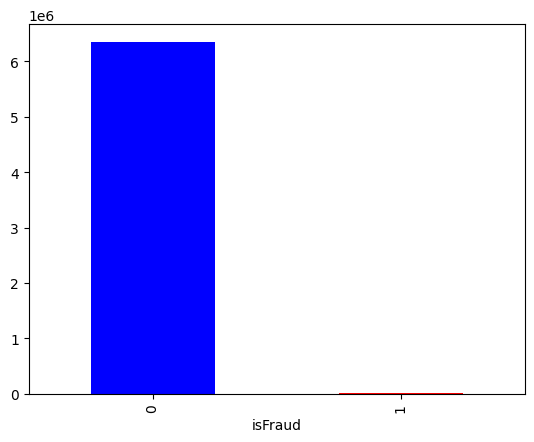

In [12]:


data['isFraud'].value_counts().plot.bar(color=['blue','red'])
plt.show()

In [13]:


print("No of transactions Flagged valid :",data['isFlaggedFraud'].value_counts()[0])
print("No of transactions Flagged fraud :",data['isFlaggedFraud'].value_counts()[1])

No of transactions Flagged valid : 6362604
No of transactions Flagged fraud : 16


In [14]:


#checking for any error at origin and destination
data['error_org']= ((data['oldbalanceOrg']-data['amount']) != data['newbalanceOrig']).astype(int)
data['error_dst']= ((data['oldbalanceDest']+data['amount']) != data['newbalanceDest']).astype(int)

error_percent_org= round(data['error_org'].value_counts()[1]/data.shape[0] * 100, 2) 
error_percent_dest= round(data['error_dst'].value_counts()[1]/data.shape[0] * 100, 2)
print("Error at Origin:",error_percent_org,"%")
print("Error at Destination:",error_percent_dest,"%")


# *This shows that the fraud occurs both at the origin and the destination.

Error at Origin: 85.09 %
Error at Destination: 74.45 %


In [15]:


print("Transactions less than Amount 0:")
print(len(data[data.amount<=0]))
print("Type of transaction:")
print(data[data.amount<=0]['type'].value_counts().index[0])
print("Are all these marked as Fraud Transactions?")
data[data.amount<=0]['isFraud'].value_counts()[1] == len(data[data.amount<=0])

Transactions less than Amount 0:
16
Type of transaction:
CASH_OUT
Are all these marked as Fraud Transactions?


np.True_

In [16]:


data_temp = data[data.isFlaggedFraud==1]
print("Minumum amount transfered in FlaggedFraud transactions")
print("\t",data_temp.amount.min())

print("Maximum amount transfered in FlaggedFraud transactions")
print("\t",data_temp.amount.max())

Minumum amount transfered in FlaggedFraud transactions
	 353874.22
Maximum amount transfered in FlaggedFraud transactions
	 10000000.0


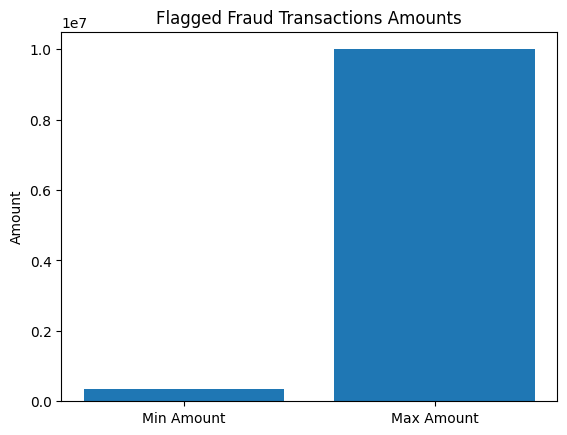

In [17]:


min_val = data_temp.amount.min()
max_val = data_temp.amount.max()

plt.bar(['Min Amount', 'Max Amount'], [min_val, max_val])
plt.title('Flagged Fraud Transactions Amounts')
plt.ylabel('Amount')

plt.show()

In [18]:


print("Transactions with amount less than or equal to 0:")
print(len(data[data.amount<=0]))
print("Type of these transactions:")
print(data[data.amount<=0]['type'].value_counts().index[0])
print("Are these transactions marked fraud?")
data[data.amount<=0]['isFraud'].value_counts()[1] == len(data[data.amount<=0])

Transactions with amount less than or equal to 0:
16
Type of these transactions:
CASH_OUT
Are these transactions marked fraud?


np.True_

In [19]:


data_temp = data[data.isFlaggedFraud==1]
print("How many frauds transactions are Flagged?:")
print("\t",len(data_temp))

print("What type of transactions are they?")
print("\t",data_temp['type'].value_counts().index[0])

print("Are all these flagged also marked as Fraud Transactions?")
print("\t",data_temp['isFraud'].value_counts()[1] == len(data_temp))

print("Minumum amount transfered in these transactions")
print("\t",data_temp.amount.min())

print("Maximum amount transfered in these transactions")
print("\t",data_temp.amount.max())


# These means most of the fraud activity happens during CASH_OUT and TRANSFER

How many frauds transactions are Flagged?:
	 16
What type of transactions are they?
	 TRANSFER
Are all these flagged also marked as Fraud Transactions?
	 True
Minumum amount transfered in these transactions
	 353874.22
Maximum amount transfered in these transactions
	 10000000.0


In [20]:


data = data.loc[(data['type'].isin(['TRANSFER', 'CASH_OUT']))]
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,error_org,error_dst
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,0,1
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,1,1
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,1,1
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,1,1


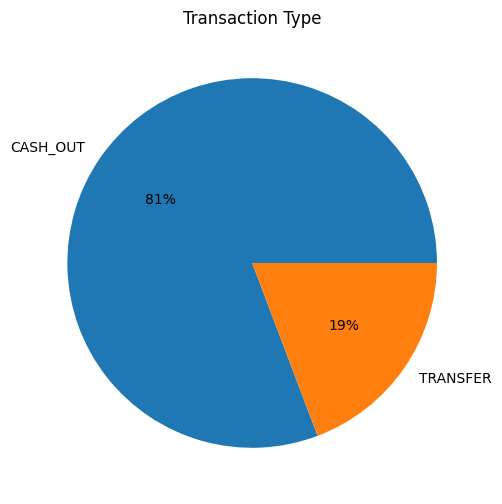

In [21]:


plt.figure(figsize=(8,6))
plt.pie(data.type.value_counts().values,labels=data.type.value_counts().index,  autopct='%.0f%%')
plt.title("Transaction Type")
plt.show()

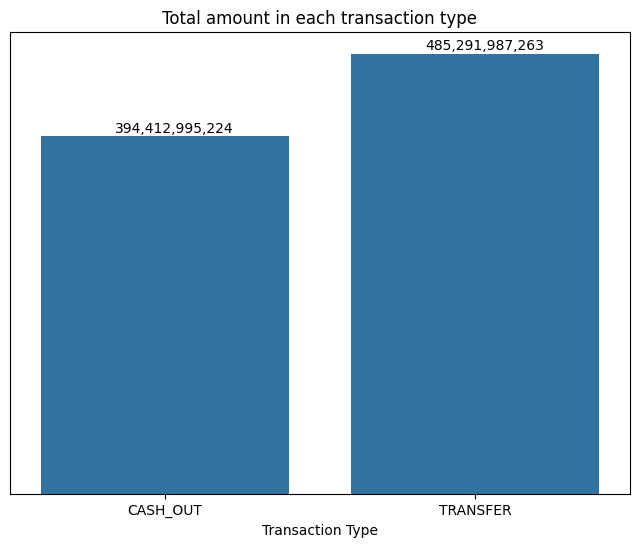

In [22]:


d = data.groupby('type')['amount'].sum()
plt.figure(figsize=(8,6))
ax = sns.barplot(x=d.index,y=d.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
    
plt.title("Total amount in each transaction type")
plt.yticks([])
plt.xlabel("Transaction Type")
plt.show()

In [23]:


data.drop(['step','type','nameOrig','nameDest','error_org','error_dst','isFlaggedFraud'],axis=1,inplace=True)
data.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,181.00,181.0,0.0,0.0,0.00,1
3,181.00,181.0,0.0,21182.0,0.00,1
15,229133.94,15325.0,0.0,5083.0,51513.44,0
19,215310.30,705.0,0.0,22425.0,0.00,0
24,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [24]:


#standardizing the values to be between 0 to 1.
ss = StandardScaler()

data.amount         = ss.fit_transform(data[['amount']])
data.oldbalanceOrg  = ss.fit_transform(data[['oldbalanceOrg']])
data.oldbalanceDest = ss.fit_transform(data[['oldbalanceDest']])
data.newbalanceOrig = ss.fit_transform(data[['newbalanceOrig']])
data.newbalanceDest = ss.fit_transform(data[['newbalanceDest']])

In [25]:


x = data.drop(["isFraud"],axis=1)
y = data.isFraud
x_train, x_test, y_train, y_test = train_test_split(x, y,stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2077806, 5), (692603, 5), (2077806,), (692603,))

In [26]:


def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    
    plt.figure(figsize=(6,6))
    plt.title("Confusion Matrix")
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='crest', cbar=False)

Classes the model predicted: [0 1]
Numbers in each class:		 0 : 691646
		 1 : 957
f1 score: 0.5813953488372093
Accuracy of this model: 0.9981807760001039


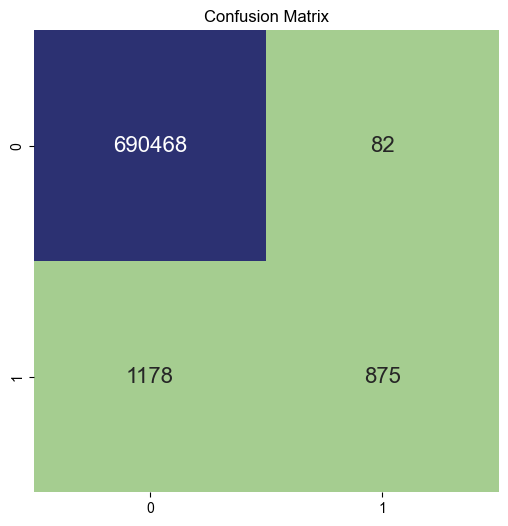

In [27]:


lr = LogisticRegression(solver='newton-cg')
lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)

print("Classes the model predicted:",np.unique( lr_pred ))
print("Numbers in each class:\t\t","0 :",len(lr_pred[lr_pred==0]))
print("\t\t 1 :",len(lr_pred[lr_pred==1]))

f1score = f1_score(y_test, lr_pred)
print('f1 score:', f1score)

conf_matrix(y_test, lr_pred)
 
acc_lr= accuracy_score(y_test, lr_pred)
print("Accuracy of this model:", acc_lr)

In [28]:


#since the data is extremely imbalanced
from sklearn.utils import resample
n = data.isFraud.value_counts()[0]

# Separate majority and minority classes
df_majority = data[data.isFraud==0]
df_minority = data[data.isFraud==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=n,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
print("The new class count are :")
df_upsampled.isFraud.value_counts()

The new class count are :


isFraud
0    2762196
1    2762196
Name: count, dtype: int64

f1 score for the testing data:	 0.8976176905395623
Accuracy of thie model:		 0.9007637401545726


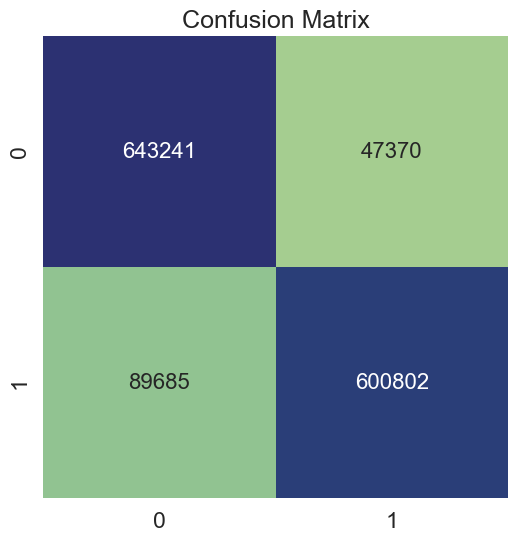

In [29]:


x = df_upsampled.drop(["isFraud"],axis = 1)
y = df_upsampled.isFraud
x_train, x_test, y_train, y_test = train_test_split(x, y)

lr = LogisticRegression(solver='newton-cg')
lr.fit(x_train, y_train)

# Predicting on the test data
up_scale_pred = lr.predict(x_test)

#Calculating and printing the f1 score 
f1up_scale_pred = f1_score(y_test, up_scale_pred)
print('f1 score for the testing data:\t', f1up_scale_pred)

#Calling function 
conf_matrix(y_test,up_scale_pred)

acc_up_scale=accuracy_score(y_test, up_scale_pred)
print("Accuracy of thie model:\t\t",acc_up_scale)

In [30]:


n = data.isFraud.value_counts()[1]

# Separate majority and minority classes

df_majority = data[data.isFraud==0]
df_minority = data[data.isFraud==1]

 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=n,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
print("The new class count are:")
print(df_downsampled.isFraud.value_counts())

The new class count are:
isFraud
0    8213
1    8213
Name: count, dtype: int64


How many class does the model predict? [0 1]
Count in each class:			 0 : 8918
					 1 : 7508
f1 score for the testing data:		 0.8760256981108072
Accuracy of the model:			 0.881346645561914


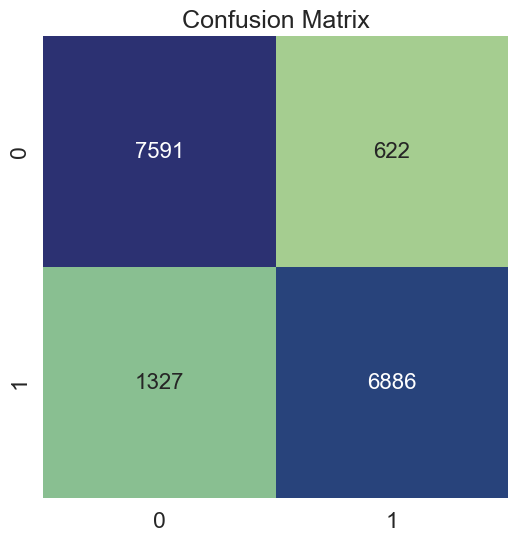

In [31]:


y = df_downsampled.isFraud
x = df_downsampled.drop(['isFraud'], axis=1)
 
# Train model
lr = LogisticRegression().fit(x, y)
 
# Predict on training set
down_scale_pred = lr.predict(x)
 
print("How many class does the model predict?",np.unique( down_scale_pred ))
print("Count in each class:\t\t\t","0 :",len(down_scale_pred[down_scale_pred==0]))
print("\t\t\t\t\t 1 :",len(down_scale_pred[down_scale_pred==1]))

#Calculating and printing the f1 score 
f1down_scale_pred = f1_score(y, down_scale_pred)
print('f1 score for the testing data:\t\t', f1down_scale_pred)

conf_matrix(y, down_scale_pred)
      
acc_down_scale=accuracy_score(y, down_scale_pred) 
print("Accuracy of the model:\t\t\t", acc_down_scale)

AUROC:			 0.9929038874676684
f1 score:		 0.7998866213151927
Accuracy of the model:	 0.9989806570286297


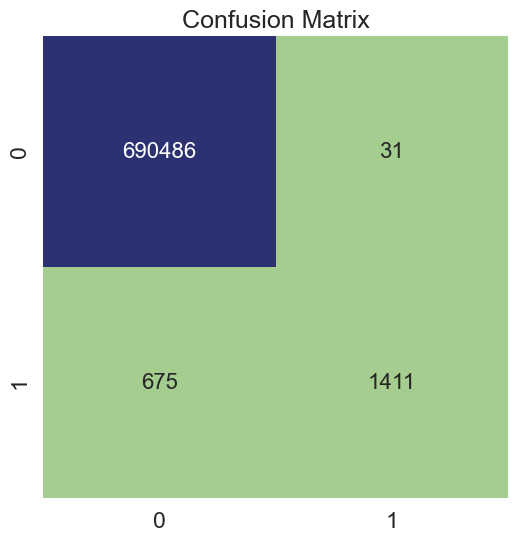

In [32]:


y = data.isFraud
x = data.drop(['isFraud'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y)

# Train model
rfc = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    min_samples_leaf=5,
    n_jobs=-1,
random_state=42
)
rfc.fit(x_train, y_train)
# Predict on training set
rfc_pred = rfc.predict(x_test)
prob_y = rfc.predict_proba(x_test)[:,1]

print("AUROC:\t\t\t",roc_auc_score(y_test, prob_y))

f1_rfc = f1_score(y_test, rfc_pred)
print('f1 score:\t\t', f1_rfc)

conf_matrix(y_test, rfc_pred)

acc_rfc=accuracy_score(y_test, rfc_pred) 
print("Accuracy of the model:\t", acc_rfc)

In [ ]:


import pandas as pd
import joblib

# Saving the trained model in .joblib format for further evaluation
data_full = pd.read_csv("Synthetic_Financial_datasets_log.csv")

# Keep only TRANSFER and CASH_OUT as in your EDA
data_model = data_full[data_full["type"].isin(["TRANSFER", "CASH_OUT"])].copy()

# Feature Engineering 
data_model["error_org"] = (data_model["oldbalanceOrg"] - data_model["amount"] != data_model["newbalanceOrig"]).astype(int)

data_model["error_dst"] = (data_model["oldbalanceDest"] + data_model["amount"] != data_model["newbalanceDest"]).astype(int)

# Final features and label
feature_cols = [
    "amount",
    "oldbalanceOrg",
    "newbalanceOrig",
    "oldbalanceDest",
    "newbalanceDest",
    "error_org",
    "error_dst",
]
target_col = "isFraud"

X = data_model[feature_cols]
y = data_model[target_col]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

#Using RandomForest model to detect fraud
rfc = RandomForestClassifier(
    n_estimators=80,
    max_depth=12,
    min_samples_leaf=5,
    n_jobs=-1,
    random_state=42,
)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUROC:", roc_auc_score(y_test, y_prob))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# Saving model for live streaming
joblib.dump(rfc, "fraud_model.pkl")
joblib.dump(feature_cols, "feature_cols.pkl")
print("Saved fraud_model.pkl and feature_cols.pkl")

In [ ]:


get_ipython().run_cell_magic('writefile', 'kafka_producer.py', 'from kafka import KafkaProducer\nimport json\nimport time\nimport random\n\nproducer = KafkaProducer(\n    bootstrap_servers="localhost:9092",\n    value_serializer=lambda v: json.dumps(v).encode("utf-8"),\n)\n\ndata = pd.read_csv("Synthetic_Financial_datasets_log.csv")\ndata = data[data["type"].isin(["TRANSFER", "CASH_OUT"])].copy()\n\nemails = ["user1@example.com", "user2@example.com", "user3@example.com"]\n\nfor _, row in data.sample(500, random_state=42).iterrows():\n    msg = {\n        "amount": float(row["amount"]),\n        "oldbalanceOrg": float(row["oldbalanceOrg"]),\n        "newbalanceOrig": float(row["newbalanceOrig"]),\n        "oldbalanceDest": float(row["oldbalanceDest"]),\n        "newbalanceDest": float(row["newbalanceDest"]),\n        "email": random.choice(emails),\n        "isFraudLabel": int(row["isFraud"]),\n    }\n    producer.send("transactions", value=msg)\n    print("Sent:", msg)\n   \xa0time.sleep(0.5)\n')

In [ ]:


get_ipython().run_cell_magic('writefile', 'fraud_consumer.py', 'from kafka import KafkaConsumer\nimport json\nimport joblib\nimport numpy as np\nimport smtplib\nfrom email.mime_text import MIMEText\n\n# Load model + feature columns\nmodel = joblib.load("fraud_model.pkl")\nfeature_cols = joblib.load("feature_cols.pkl")\n\n# setting gmail \nSENDER_EMAIL = "ishvee09@gmail.com"\nSENDER_APP_PASSWORD = "gtbv ejut zjvh zsrz"  # Gmail App Password\n\ndef send_fraud_email(to_email, amount, prob):\n    if not to_email:\n        return\n    body = (\n        " Suspicious transaction detected.\\n\\n"\n        f"Amount: {amount}\\n"\n        f"Model fraud probability: {prob:.2f}\\n\\n"\n        "If this was not you, please contact the bank immediately."\n    )\n    msg = MIMEText(body)\n    msg["Subject"] = "Fraud Alert"\n    msg["From"] = SENDER_EMAIL\n    msg["To"] = to_email\n\n    with smtplib.SMTP_SSL("smtp.gmail.com", 465) as server:\n        server.login(SENDER_EMAIL, SENDER_APP_PASSWORD)\n        server.send_message(msg)\n\nconsumer = KafkaConsumer(\n    "transactions",\n    bootstrap_servers="localhost:9092",\n    value_deserializer=lambda v: json.loads(v.decode("utf-8")),\n    auto_offset_reset="latest",\n    enable_auto_commit=True,\n)\n\nprint("Listening for transactions...")\n\nfor msg in consumer:\n    data = msg.value\n\n    amount = float(data["amount"])\n    old_org = float(data["oldbalanceOrg"])\n    new_org = float(data["newbalanceOrig"])\n    old_dst = float(data["oldbalanceDest"])\n    new_dst = float(data["newbalanceDest"])\n\n    error_org = int(old_org - amount != new_org)\n    error_dst = int(old_dst + amount != new_dst)\n\n    row_dict = {\n        "amount": amount,\n        "oldbalanceOrg": old_org,\n        "newbalanceOrig": new_org,\n        "oldbalanceDest": old_dst,\n        "newbalanceDest": new_dst,\n        "error_org": error_org,\n        "error_dst": error_dst,\n    }\n\n    X = np.array([[row_dict[c] for c in feature_cols]])\n    prob = model.predict_proba(X)[0, 1]\n    pred = int(prob >= 0.5)\n\n    print("Received:", data, "=> prob:", prob, "pred:", pred)\n\n    if pred == 1:\n        send_fraud_email(data["email"], amount, prob)\n        print("Fraud email sent to",\xa0data["email"])\n')

In [ ]:


SENDER_EMAIL = "ishvee09@gmail.com"
SENDER_APP_PASSWORD = "gtbv ejut zjvh zsrz"  

In [ ]:


def send_fraud_email(to_email, amount, prob):
    if not to_email:
        return

    body = (
        "Suspicious transaction detected!\n\n"
        f"Amount: {amount}\n"
        f"Fraud Probability: {prob:.2f}\n\n"
        "If this was not you, please contact the bank immediately."
    )

    msg = MIMEText(body)
    msg["Subject"] = "Fraud Alert"
    msg["From"] = SENDER_EMAIL
    msg["To"] = to_email

    try:
        server = smtplib.SMTP("smtp.gmail.com", 587)
        server.starttls()
        server.login(SENDER_EMAIL, SENDER_APP_PASSWORD)
        server.send_message(msg)
        server.quit()
        print(" Fraud alert email sent!")
    except Exception as e:
        print(" Email sending failed:",e)

In [ ]:


from kafka import KafkaConsumer
import json
consumer = KafkaConsumer(
    "fraud_transactions",
    bootstrap_servers="localhost:9092",
    value_deserializer=lambda x: json.loads(x.decode("utf-8"))
)

print(" Kafka Consumer started... Waiting for messages...")

In [ ]:


#saving the final model
import joblib

model = joblib.load("fraud_model.pkl")
feature_cols = joblib.load("feature_cols.pkl")

print("Model and feature columns loaded!")

In [ ]:


for message in consumer:
    txn = message.value

    # Building feature vector in correct order
    feature_values = [txn[col] for col in feature_cols]
    X_live = np.array(feature_values).reshape(1, -1)

    # Predicting fraud probability
    prob = model.predict_proba(X_live)[0, 1]

    print("Transaction received:", txn)
    print("Fraud probability:", prob)

    
    if prob > 0.000001 :
        send_fraud_email(
            to_email=txn.get("email"),
            amount=txn.get("amount"),
            prob=prob)